# CS F415 - Data Mining 

## Section 1 - Data Preprocessing 

This notebook will contain basic information about the various data preprocessing techniques as mentioned in the lectures followed by code snippets in python that will help you realise these methods on a sample dataset. The Notebook will first contain brief information about the types of data and then cover the various preprocessing techniques. The preprocessing techniques that will be covered in this notebook are:
* Aggregation
* Sampling
* Dimensionality Reduction 
* Feature Subset Selection
* Feature Creation Discretization and Binarization
* Attribute Transformation

### Step 1: Python and Jupyter Environment Setup

This section is for people who have never worked with Jupyter or used Python for Data Science Related Applications. In case you already have the environment setup, feel free to skip to this [section](#cell2)

Check out: [What are Jupyter Notebooks/IPython Notebooks?](https://www.youtube.com/watch?v=jZ952vChhuI)

In order to run these notebooks on your device or to create notebooks such as these for hands on experience, there are several approaches:

#### Approach 1. Google Colab 

Advantages: 
* Google Colab allows you to remotely access a computer on the cloud which already has the environment setup and the most popular Machine Learning (ML), Deep Learning (DL) and Natural Language Processing (NLP) Libraries installed which allows a user with any hardware to perform computationally-intensive ML and DL tasks even with weak hardware
* This means you can directly start getting some hands on experience with these notebooks.
* For Beginners with little experience in setting up environments, Google Colab is the best way to start. 
* You have access to more powerful Server-Class Graphics Processing Units (GPUs) as compared to the ones available to general consumers which as Desktop-Class GPUs which are sometimes required for more powerful Machine Learning and Deep Learning Tasks

Disadvantages: 
* The Cloud environment means that the resources that google can provide for free are limited and thus, upon some idle time away from the notebook your session would be reset including the storage and any files you may have saved in that session. 
* The GPUs that are available are often available for limited periods of time and are easy to exhaust. If exhausted, one may need to purchase additional GPU credits.

You can access Google Colab using the URL: https://colab.research.google.com/

---

#### Approach 2. The next method is to use Anaconda Navigator and a Local Jupyter Server. 

This method requires a bit of initial setup and this varies based on the Operating System of the user and this method is hardware dependent.

Advantages:
* The server is always running as long as you decide to kill it which means that all the local variables and the files you require for input and any output files generated will always be safely stored on your local storage.
* Running locally means that your data remains private and lets you access the notebook when offline

Disadvantages:
* The initial setup with anaconda could be error prone and tricky if the user already has python installed on their system. 
* Forgetting to kill the server before quitting the jupyter environment may result in some issues. 
* The hardware a user can use is limited to the hardware that a user can access

[Setup Tutorial for Windows](https://www.xda-developers.com/how-install-jupyter-notebook-windows/)

[Setup Tutorial for MacOS](https://www.youtube.com/watch?v=A_xY5eL_IKU)

[Setup Tutorial for Linux(Debian Based Distros - Ubuntu)](https://www.youtube.com/watch?v=wotkLCoJ_ks)

---

#### Approach 3. Installing Python and Setting up Jupyter Environment on Visual Studio Code

Advantages:
* Similar to Jupyter Server, it runs locally so it contains the same advantages
* Since it runs on a fully fledged IDE like Visual Studio Code, One can customize the interface to fit their convenience and install additional extensions which could help the experience. 
* Server is always killed when you close Visual Studio Code
* Similar Setup for all operating systems once you get Python Setup and install Visual Studio Code

Disadvantages:
* Restriced to user hardware
* Initial Setup can be a bit tedious

Setup Tutorial for Python: 
* Windows: https://docs.python.org/3/using/windows.html
* MacOS: https://docs.python.org/3/using/mac.html
* Linux (Ubuntu): https://phoenixnap.com/kb/how-to-install-python-3-ubuntu

Setup Tutorial for Visual Studio Code: https://code.visualstudio.com/learn/get-started/basics

Setup Tutorial for Jupyter on Visual Studio Code: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

---

Once the environment is setup, you may be required to install some python libraries that are needed to run this notebook. At any point in the notebook, if you receive an error such as: 

 `import 'numpy' is not resolved`

Use the pip library to install the library. In case you are running on colab, most of the libraries would already be installed but in case there is a library that isnt on the colab environment use:

`!pip install numpy`

After installing the Libraries the rest of the cells in this notebook can be run without any issues. 

--- 

For the rest of this notebook we will be using popular data science libraries, the links for the documentation would be provided through which any doubt regarding the syntax can be clarified but in case of more doubts please look it up on the internet until you understand what the cell is achieving.

Also check out: 
* [Intro to Numpy](https://www.youtube.com/watch?v=xECXZ3tyONo)

* [Intro to Pandas and Matplotlib](https://www.youtube.com/watch?v=a9UrKTVEeZA)

---



<a id='cell2'></a>

### Step 2: Importing a Dataset, Some Useful Functions and Dealing with Missing Data

#### Importing the Libraries and a CSV File Dataset into a Pandas DataFrame

In [71]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

* Throughout the rest of this notebook we will be adding certain libraries as we require them. 
* The datasets used for different parts of the notebook may also vary so ensure that you have all the datasets downloaded.

For the example here, we are using a dataset that contains Indian Rainfall Data through which we will cover some basic explorations you can

`pd.read_csv()`

This Function allows us to import the comma seperated value file as a Pandas DataFrame.

In [72]:
df = pd.read_csv('./Datasets/Data_Preprocessing/rainfall.csv')

#### Some Useful Functions that can be used on DataFrames

`DataFrame.head()`

This Function shows the first 5 entries of the DataFrame.

In [73]:
df.head()

,index,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


`DataFrame.info()`

This Function lets us view some information about the DataFrame Columns and their Datatypes.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4116 non-null   int64  
 1   SUBDIVISION  4116 non-null   object 
 2   YEAR         4116 non-null   int64  
 3   JAN          4112 non-null   float64
 4   FEB          4113 non-null   float64
 5   MAR          4110 non-null   float64
 6   APR          4112 non-null   float64
 7   MAY          4113 non-null   float64
 8   JUN          4111 non-null   float64
 9   JUL          4109 non-null   float64
 10  AUG          4112 non-null   float64
 11  SEP          4110 non-null   float64
 12  OCT          4109 non-null   float64
 13  NOV          4105 non-null   float64
 14  DEC          4106 non-null   float64
 15  ANNUAL       4090 non-null   float64
 16  Jan-Feb      4110 non-null   float64
 17  Mar-May      4107 non-null   float64
 18  Jun-Sep      4106 non-null   float64
 19  Oct-De

`DataFrame.describe()`

This Function displays the statistics about the DataFrame's columns.

In [75]:
df.describe()

,index,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,2057.500000,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,1188.331183,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,0.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1028.750000,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,2057.500000,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,3086.250000,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,4115.000000,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


#### Dealing with Missing Data

##### Approach 1: Dropping the Rows that contain the missing data

`DataFrame.isnull().sum()`

This snippet shows how one can count the number of Null values in a dataset by Column name.

In [76]:
df.isnull().sum()

index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

`DataFrame.dropna()` and  `DataFrame.drop_duplicates()`

The first function allows us to drop the null values and the second allows us to drop duplicates

In [77]:
df = df.dropna()
df = df.drop_duplicates()
df.isnull().sum()

index          0
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

##### Approach 2: Imputing the Data with Statistical Data such as Mean, Median or Mode

In [80]:
df = pd.read_csv('./Datasets/Data_Preprocessing/rainfall.csv')

In [81]:
df.isnull().sum()

index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

`DataFrame.fillna()`

In [82]:
df['ANNUAL'] = df['ANNUAL'].fillna(df['ANNUAL'].median())

# Similarly the null values can be filled with the mean

# df = df['ANNUAL'].fillna(df['ANNUAL'].mean())
df.isnull().sum()

index           0
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL          0
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

### Step 3: Data Preprocessing - Intro

The next few sections will contain code snippets of how to implement the data preprocessing methods discussed in the class. The following sections may contain some lines where the objective of the lines are unclear, please refer to the official documentations for the library to understand them better.

* [Numpy Documentation]('https://numpy.org/doc/')

* [Pandas Documentation]('https://pandas.pydata.org/docs/')

* [Matplotlib Documentation]('https://matplotlib.org/stable/index.html')

### Step 3.1: Data Preprocessing - Aggregation

*Data aggregation is the process of compiling typically (large) amounts of information from a given database and organizing it into a more consumable and comprehensive medium. Data aggregation can be applied at any scale, from pivot tables to data lakes, in order to summarize information and make conclusions based on data-rich findings. Because of the growing accessibility to information and importance of personalization metrics across the enterprise, the application of data aggregation has become extremely relevant.*

* Combining two or more attributes (or objects) into a single attribute (or object)
* Purpose
    * Data reduction
        * Reduce the number of attributes or objects
    * Change of scale
        * Cities aggregated into regions, states, countries, etc
    * More “stable” data
        * Aggregated data tends to have less variability 

In [94]:
df_aggregation = pd.read_csv('./Datasets/Data_Preprocessing/US_CPI_Yearly.csv')
df_aggregation.head()

,Year,Month,CPI
0,1913,1,9.8
1,1913,2,9.8
2,1913,3,9.8
3,1913,4,9.8
4,1913,5,9.7


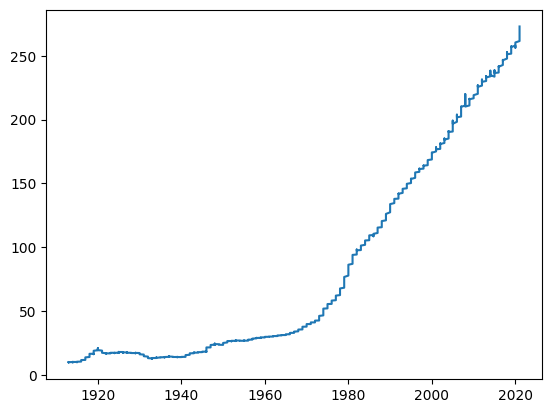

In [106]:
plt.plot(df_aggregation['Year'],df_aggregation['CPI'])
plt.show()

We can group the data above by the year and take the average CPI of the entire year

In [98]:
df_aggregation_grouped = df_aggregation.groupby(['Year']).mean()[['CPI']]
df_aggregation_grouped

,CPI
Year,
1913,9.883333
1914,10.016667
1915,10.108333
1916,10.883333
1917,12.825000
...,...
2017,245.119583
2018,251.106833
2019,255.657417


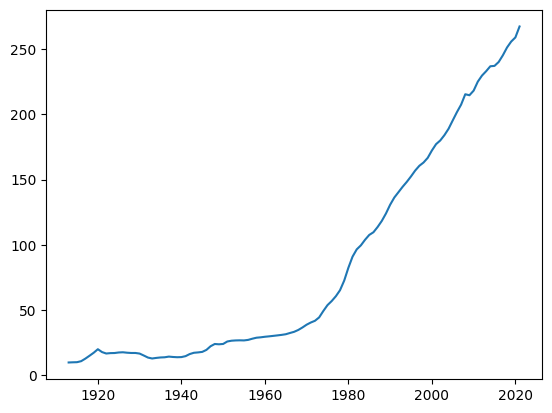

In [107]:
plt.plot(df_aggregation_grouped.index,df_aggregation_grouped['CPI'])
plt.show()

### Step 3.2: Data Preprocessing - Sampling

*Data sampling is a statistical analysis technique used to select, manipulate and analyze a representative subset of data points to identify patterns and trends in the larger data set being examined. It enables data scientists, predictive modelers and other data analysts to work with a small, manageable amount of data about a statistical population to build and run analytical models more quickly, while still producing accurate findings.*



### Step 3.3 Data Preprocessing - Dimensionality Reduction

### Step 3.4 Data Preprocessing - Feature Subset Selection

### Step 3.5 Data Preprocessing - Feature Creating Discretization and Binarization

### Step 3.6 Data Preprocessing - Attribute Transformation